In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [179]:
orginal_data=pd.read_csv("/content/housing.csv")
data=orginal_data.copy()
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [181]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [182]:
data["total_bedrooms"].fillna(method="ffill",inplace=True)
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [183]:
data.drop(columns=["ocean_proximity"],inplace=True)

In [184]:
features=data.iloc[:,:-1].values
target=data.iloc[:,-1].values
cols=data.columns

In [185]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=42)

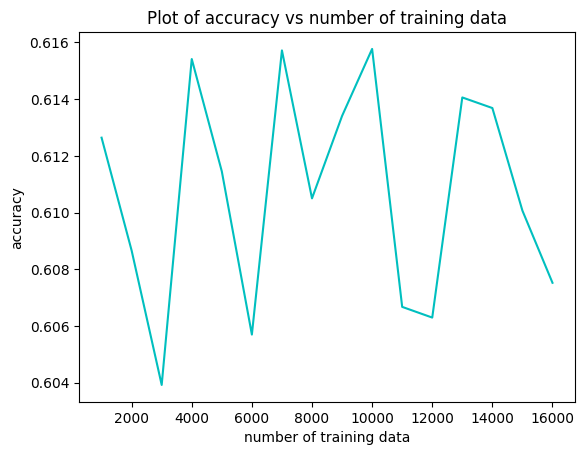

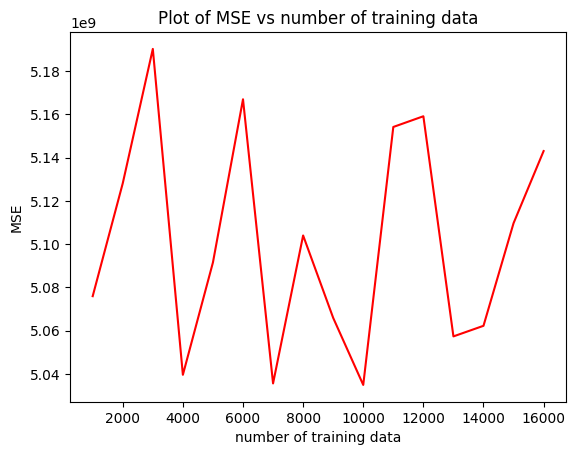

In [186]:
# fit linear regression with different train size
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
r2_scores=[]
mse_scores=[]
train_size=1000*np.arange(1,round(xtrain.shape[0]/1000))

for i in train_size:
  indices = np.random.choice(xtrain.shape[0], i)
  new_xtrain=xtrain[indices]
  new_ytrain=ytrain[indices]
  lr=LinearRegression().fit(new_xtrain,new_ytrain)

  ypred=lr.predict(xtest)

  score=lr.score(xtest,ytest)

  mse=mean_squared_error(ytest,ypred)
  r2_scores.append(score)

  mse_scores.append(mse)

plt.plot(train_size,r2_scores,color="c")
plt.title("Plot of accuracy vs number of training data")
plt.xlabel("number of training data")
plt.ylabel("accuracy")

plt.show()

plt.plot(train_size,mse_scores,color="r")
plt.title("Plot of MSE vs number of training data")
plt.xlabel("number of training data")
plt.ylabel("MSE")

plt.show()

### normalize data

In [187]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(xtrain)
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

max_price=ytrain.max()
ytrain=ytrain/max_price
ytest=ytest/max_price

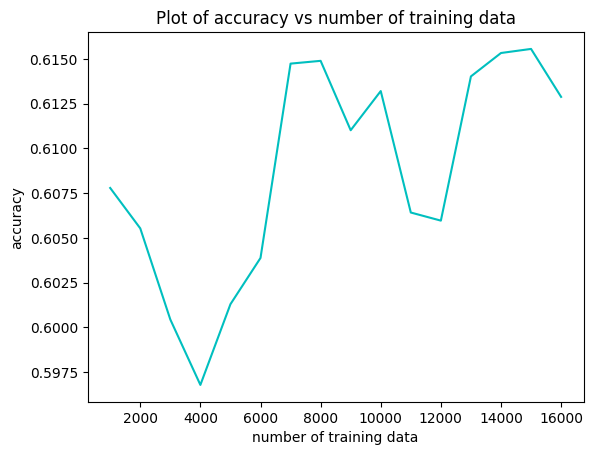

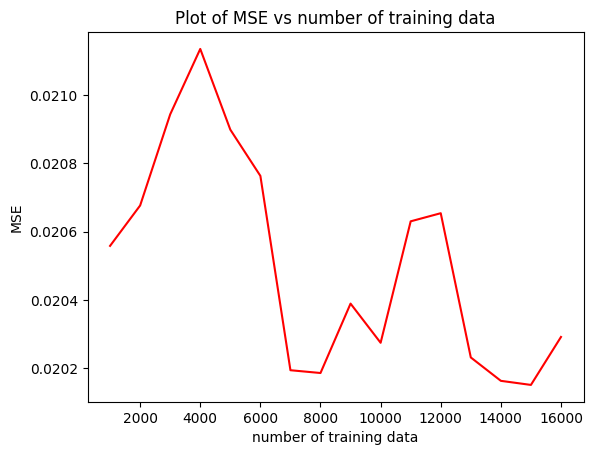

In [188]:
# fit linear regression with different train size
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
r2_scores=[]
mse_scores=[]
train_size=1000*np.arange(1,round(xtrain.shape[0]/1000))

for i in train_size:
  indices = np.random.choice(xtrain.shape[0], i)
  new_xtrain=xtrain[indices]
  new_ytrain=ytrain[indices]
  lr=LinearRegression().fit(new_xtrain,new_ytrain)

  ypred=lr.predict(xtest)

  score=lr.score(xtest,ytest)

  mse=mean_squared_error(ytest,ypred)
  r2_scores.append(score)

  mse_scores.append(mse)

plt.plot(train_size,r2_scores,color="c")
plt.title("Plot of accuracy vs number of training data")
plt.xlabel("number of training data")
plt.ylabel("accuracy")

plt.show()

plt.plot(train_size,mse_scores,color="r")
plt.title("Plot of MSE vs number of training data")
plt.xlabel("number of training data")
plt.ylabel("MSE")

plt.show()

In [189]:
### fit model on the entire data
lr=LinearRegression().fit(xtrain,ytrain)

ypred=lr.predict(xtest)

score=lr.score(xtest,ytest)

mse=mean_squared_error(ytest,ypred)

print(f"MSE : {mse}   R2 : {score}")

MSE : 0.020357881541167366   R2 : 0.611610510328928


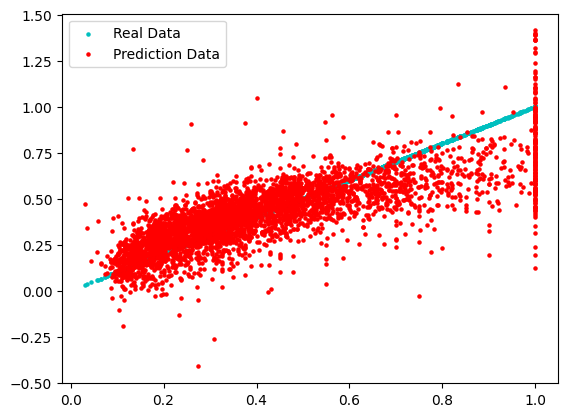

In [190]:
plt.scatter(ytest,ytest,color="c",s=5)
plt.scatter(ytest,ypred,color="r",s=5)
plt.legend(["Real Data","Prediction Data"])
plt.show()

### degree of freedom

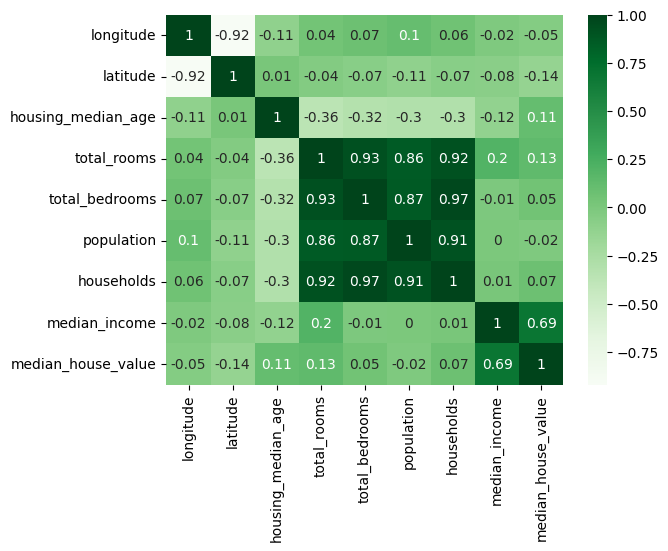

In [191]:
import seaborn as sns
corr=data.corr()

sns.heatmap(np.round(corr,2),cmap="Greens",annot=True)
plt.show()

In [192]:
high_corr_val=np.sort(abs(corr["median_house_value"]))[4:-1]
high_corr_val=np.array([high_corr_val,-high_corr_val])
high_corr_val=high_corr_val.reshape(-1)
improtant_columns=corr["median_house_value"][corr["median_house_value"].isin(high_corr_val)].index
improtant_columns

Index(['latitude', 'housing_median_age', 'total_rooms', 'median_income'], dtype='object')

In [193]:
features_df=data[improtant_columns].values
target_df=data.iloc[:,-1].values


xtrain_df,xtest_df,ytrain_df,ytest_df=train_test_split(features_df,target_df,test_size=0.2,random_state=42)

In [194]:
scaler_df=MinMaxScaler().fit(xtrain_df)
xtrain_df=scaler_df.fit_transform(xtrain_df)
xtest_df=scaler_df.transform(xtest_df)

max_price=ytrain_df.max()
ytrain_df=ytrain_df/max_price
ytest_df=ytest_df/max_price

In [195]:
lr=LinearRegression().fit(xtrain_df,ytrain_df)

ypred_df=lr.predict(xtest_df)

score=lr.score(xtest_df,ytest_df)

mse=mean_squared_error(ytest_df,ypred_df)

print(f"MSE : {mse}   R2 : {score}")

MSE : 0.025845832855458047   R2 : 0.5069108830132449


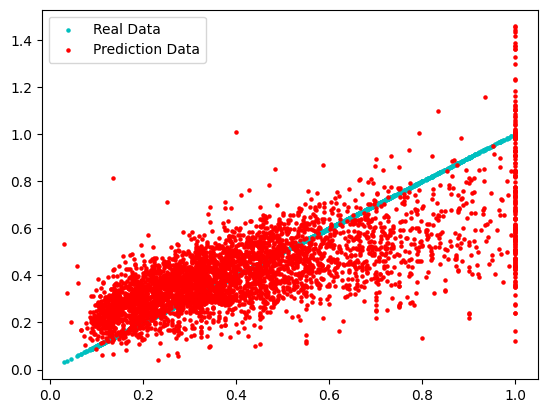

In [196]:
plt.scatter(ytest_df,ytest_df,color="c",s=5)
plt.scatter(ytest_df,ypred_df,color="r",s=5)
plt.legend(["Real Data","Prediction Data"])
plt.show()

### regulizer

In [197]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

ridge_mse=[]
ridge_r2=[]
alpha_list= [0.0001,0.001,0.01,0.1,1,10,100]
for i in alpha_list:
  ridge = Ridge(alpha=i)
  ridge.fit(xtrain, ytrain)
  ridge_pred = ridge.predict(xtest)
  mse = mean_squared_error(ytest, ridge_pred)
  ridge_mse.append(mse)

  r2=ridge.score(xtest,ytest)
  ridge_r2.append(r2)
best_ridge_alpha=alpha_list[ridge_mse.index(min(ridge_mse))]

best_ridge_r2=ridge_r2[ridge_mse.index(min(ridge_mse))]
print(f"best alpha ridge : {best_ridge_alpha}")
print(f"best R2 ridge : {best_ridge_r2}")

best alpha ridge : 1
best R2 ridge : 0.6139309957487316


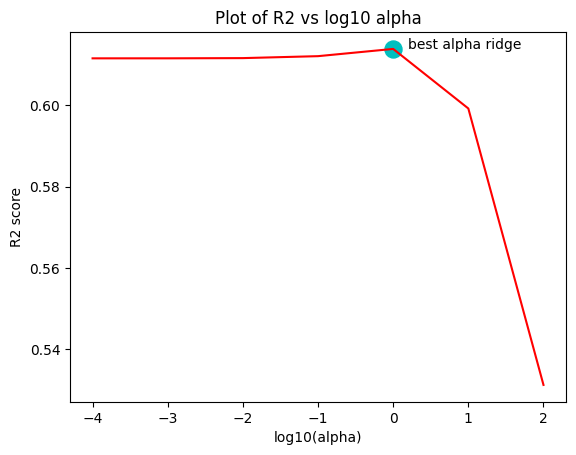

In [198]:
plt.plot(np.log10(alpha_list),ridge_r2,color="r")
plt.scatter(np.log10(best_ridge_alpha),best_ridge_r2,color="c",s=150)
plt.text(np.log10(best_ridge_alpha)+0.2,best_ridge_r2,"best alpha ridge")
plt.title("Plot of R2 vs log10 alpha")
plt.xlabel("log10(alpha)")
plt.ylabel("R2 score")
plt.show()

In [199]:
lasso_mse=[]

lasso_r2=[]
alpha_list= [0.0001,0.001,0.01,0.1,1,10,100]
for i in alpha_list:
  lasso = Lasso(alpha=i)
  lasso.fit(xtrain, ytrain)
  lasso_pred = lasso.predict(xtest)
  mse = mean_squared_error(ytest, lasso_pred)
  lasso_mse.append(mse)


  r2=lasso.score(xtest,ytest)
  lasso_r2.append(r2)
best_lasso_alpha=alpha_list[lasso_mse.index(min(lasso_mse))]
best_lasso_r2=lasso_r2[lasso_mse.index(min(lasso_mse))]

print(f"best alpha for lasso : {best_lasso_alpha}")
print(f"best R2 lasso : {best_lasso_r2}")

best alpha for lasso : 0.0001
best R2 lasso : 0.6109682913084415


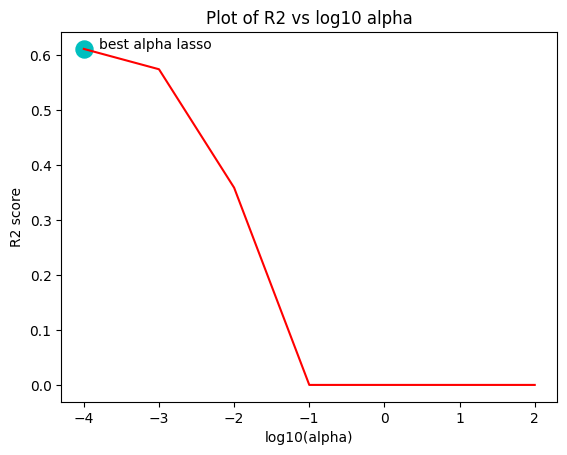

In [200]:
plt.plot(np.log10(alpha_list),lasso_r2,color="r")
plt.scatter(np.log10(best_lasso_alpha),best_lasso_r2,color="c",s=150)
plt.text(np.log10(best_lasso_alpha)+0.2,best_lasso_r2,"best alpha lasso")
plt.title("Plot of R2 vs log10 alpha")
plt.xlabel("log10(alpha)")
plt.ylabel("R2 score")
plt.show()

In [201]:
elastic_mse=[]
elastic_r2=[]
alpha_list= [0.0001,0.001,0.01,0.1,1,10,100]
l1_ratio_list=[0.25, 0.5, 0.75, 1]

for i in alpha_list:
  mse_list=[]
  r2_list=[]
  for j in l1_ratio_list:
    elastic = ElasticNet(alpha=i,l1_ratio=j)
    elastic.fit(xtrain, ytrain)
    elastic_pred = elastic.predict(xtest)
    mse = mean_squared_error(ytest, elastic_pred)
    mse_list.append(mse)



    r2=elastic.score(xtest,ytest)
    
    r2_list.append(r2)

  elastic_mse.append(mse_list)
  elastic_r2.append(r2_list)


min_index = np.argmin(elastic_mse)
min_index_2d = np.unravel_index(min_index, np.array(elastic_mse).shape)


best_elastic_alpha=alpha_list[min_index_2d[0]]
best_l1_ratio_list=l1_ratio_list[min_index_2d[1]]

best_elasticnet_r2=elastic_r2[min_index_2d[0]][min_index_2d[1]]

print(f"best alpha for elastic : {best_elastic_alpha} best l1_ratio_list : {best_l1_ratio_list}  ")
print(f"best R2 Elasticnet : {best_elasticnet_r2}")

best alpha for elastic : 0.0001 best l1_ratio_list : 0.25  
best R2 Elasticnet : 0.6132698093840672


### nonlinear

In [202]:
from sklearn.preprocessing import PolynomialFeatures
poly_mse_scores = []
poly_r2_scores=[]
degrees = range(1, 7)
for degree in degrees:

    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(xtrain)
    X_poly_test = poly.transform(xtest)

    model = LinearRegression()
    model.fit(X_poly_train, ytrain)
    y_pred = model.predict(X_poly_test)

    poly_mse_scores.append(mean_squared_error(ytest,y_pred))
    
    poly_r2_scores.append(model.score(X_poly_test,ytest))

best_degree_all=np.argmin(np.array(poly_mse_scores))+1
min_mse=poly_mse_scores[poly_mse_scores.index(min(poly_mse_scores))]

best_poly_r2=poly_r2_scores[poly_mse_scores.index(min(poly_mse_scores))]
print(f"best degree : {best_degree_all}")
print(f"minimum score : {min_mse}")
print(f"best poly score : {best_poly_r2}")





best degree : 2
minimum score : 0.01879386021911234
best poly score : 0.641449049367445


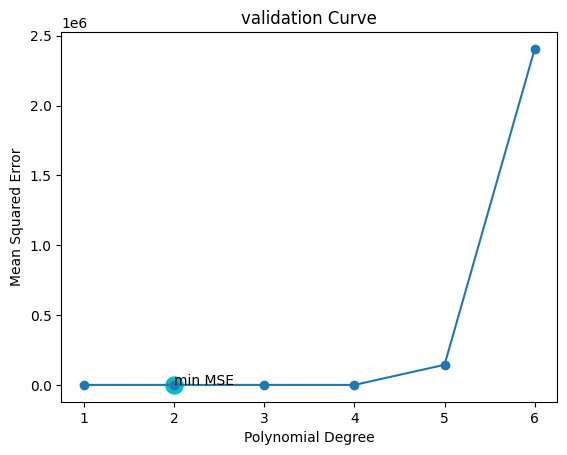

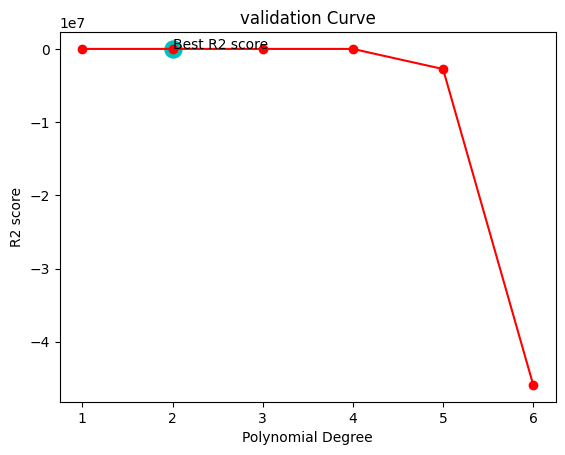

In [203]:
plt.plot(degrees, poly_mse_scores, 'o-')
plt.title('validation Curve')
plt.scatter(best_degree_all,min_mse,color="c",s=150)

plt.text(best_degree_all,min_mse,"min MSE")

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.show()

plt.plot(degrees, poly_r2_scores, 'o-',color="r")




plt.title('validation Curve')
plt.scatter(best_degree_all,best_poly_r2,color="c",s=150)

plt.text(best_degree_all,best_poly_r2,"Best R2 score")
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 score')
plt.show()

### fit model with difference degree of freedom 

In [204]:
from sklearn.preprocessing import PolynomialFeatures
poly_mse_scores = []
poly_r2_scores=[]
degrees = range(1, 7)
for degree in degrees:

    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(xtrain_df)
    X_poly_test = poly.transform(xtest_df)

    model = LinearRegression()
    model.fit(X_poly_train, ytrain)
    y_pred = model.predict(X_poly_test)

    poly_mse_scores.append(mean_squared_error(ytest,y_pred))
    
    poly_r2_scores.append(model.score(X_poly_test,ytest))

best_degree_df=np.argmin(np.array(poly_mse_scores))+1
min_mse=poly_mse_scores[poly_mse_scores.index(min(poly_mse_scores))]

best_poly_r2=poly_r2_scores[poly_mse_scores.index(min(poly_mse_scores))]
print(f"best degree : {best_degree_df}")
print(f"minimum score : {min_mse}")
print(f"best poly score : {best_poly_r2}")





best degree : 4
minimum score : 0.023057066354310297
best poly score : 0.5601152204096618


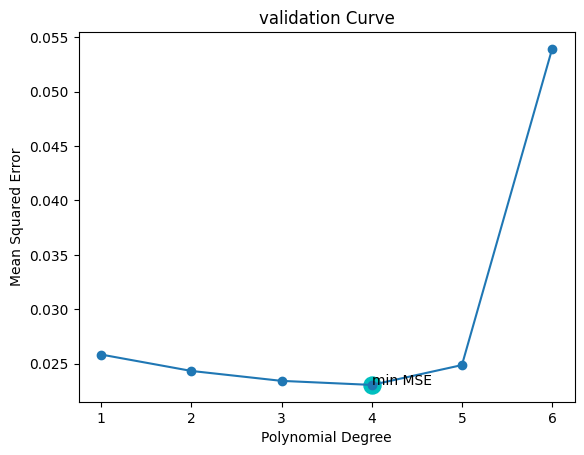

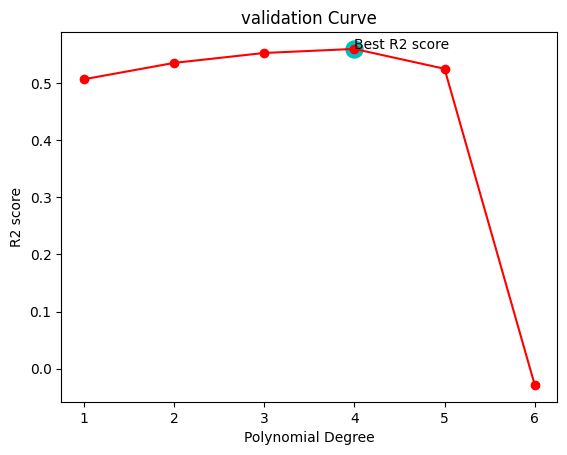

In [205]:
plt.plot(degrees, poly_mse_scores, 'o-')
plt.title('validation Curve')
plt.scatter(best_degree_df,min_mse,color="c",s=150)

plt.text(best_degree_df,min_mse,"min MSE")

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.show()

plt.plot(degrees, poly_r2_scores, 'o-',color="r")




plt.title('validation Curve')
plt.scatter(best_degree_df,best_poly_r2,color="c",s=150)

plt.text(best_degree_df,best_poly_r2,"Best R2 score")
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 score')
plt.show()

### regulizer

In [206]:
reg_poly=PolynomialFeatures(best_degree_all)
X_poly_train = reg_poly.fit_transform(xtrain_df)
X_poly_test = reg_poly.transform(xtest_df)



In [207]:
ridge_mse=[]
ridge_r2=[]
alpha_list= [0.0001,0.001,0.01,0.1,1,10,100]
for i in alpha_list:
  ridge = Ridge(alpha=i)
  ridge.fit(X_poly_train, ytrain)
  ridge_pred = ridge.predict(X_poly_test)
  mse = mean_squared_error(ytest, ridge_pred)
  ridge_mse.append(mse)

  r2=ridge.score(X_poly_test,ytest)
  ridge_r2.append(r2)
best_ridge_alpha=alpha_list[ridge_mse.index(min(ridge_mse))]

best_ridge_r2=ridge_r2[ridge_mse.index(min(ridge_mse))]
print(f"best alpha ridge : {best_ridge_alpha}")
print(f"best R2 ridge : {best_ridge_r2}")

best alpha ridge : 0.0001
best R2 ridge : 0.5356149331388104


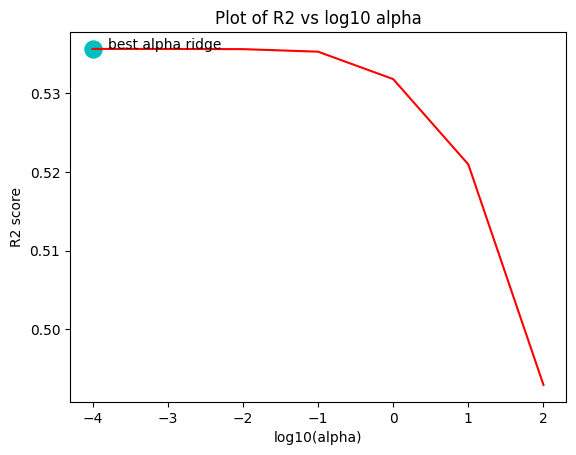

In [208]:
plt.plot(np.log10(alpha_list),ridge_r2,color="r")
plt.scatter(np.log10(best_ridge_alpha),best_ridge_r2,color="c",s=150)
plt.text(np.log10(best_ridge_alpha)+0.2,best_ridge_r2,"best alpha ridge")
plt.title("Plot of R2 vs log10 alpha")
plt.xlabel("log10(alpha)")
plt.ylabel("R2 score")
plt.show()

best alpha for lasso : 0.0001
best R2 lasso : 0.5275026450164736


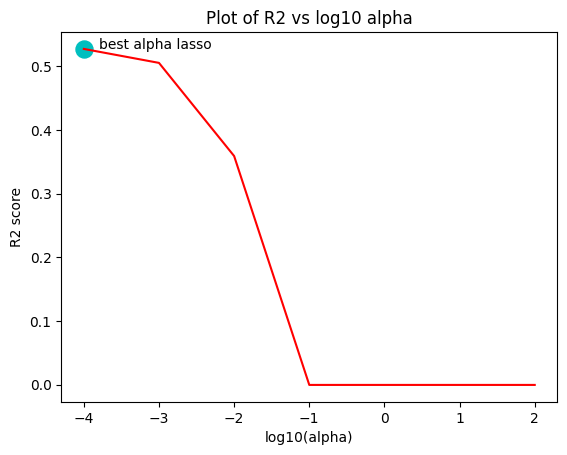

In [209]:
lasso_mse=[]

lasso_r2=[]
alpha_list= [0.0001,0.001,0.01,0.1,1,10,100]
for i in alpha_list:
  lasso = Lasso(alpha=i)
  lasso.fit(X_poly_train, ytrain)
  lasso_pred = lasso.predict(X_poly_test)
  mse = mean_squared_error(ytest, lasso_pred)
  lasso_mse.append(mse)


  r2=lasso.score(X_poly_test,ytest)
  lasso_r2.append(r2)
best_lasso_alpha=alpha_list[lasso_mse.index(min(lasso_mse))]
best_lasso_r2=lasso_r2[lasso_mse.index(min(lasso_mse))]

print(f"best alpha for lasso : {best_lasso_alpha}")
print(f"best R2 lasso : {best_lasso_r2}")


plt.plot(np.log10(alpha_list),lasso_r2,color="r")
plt.scatter(np.log10(best_lasso_alpha),best_lasso_r2,color="c",s=150)
plt.text(np.log10(best_lasso_alpha)+0.2,best_lasso_r2,"best alpha lasso")
plt.title("Plot of R2 vs log10 alpha")
plt.xlabel("log10(alpha)")
plt.ylabel("R2 score")
plt.show()

In [210]:
elastic_mse=[]
elastic_r2=[]
alpha_list= [0.0001,0.001,0.01,0.1,1,10,100]
l1_ratio_list=[0.25, 0.5, 0.75, 1]

for i in alpha_list:
  mse_list=[]
  r2_list=[]
  for j in l1_ratio_list:
    elastic = ElasticNet(alpha=i,l1_ratio=j)
    elastic.fit(X_poly_train, ytrain)
    elastic_pred = elastic.predict(X_poly_test)
    mse = mean_squared_error(ytest, elastic_pred)
    mse_list.append(mse)



    r2=elastic.score(X_poly_test,ytest)
    
    r2_list.append(r2)

  elastic_mse.append(mse_list)
  elastic_r2.append(r2_list)


min_index = np.argmin(elastic_mse)
min_index_2d = np.unravel_index(min_index, np.array(elastic_mse).shape)


best_elastic_alpha=alpha_list[min_index_2d[0]]
best_l1_ratio_list=l1_ratio_list[min_index_2d[1]]

best_elasticnet_r2=elastic_r2[min_index_2d[0]][min_index_2d[1]]

print(f"best alpha for elastic : {best_elastic_alpha} best l1_ratio_list : {best_l1_ratio_list}  ")
print(f"best R2 Elasticnet : {best_elasticnet_r2}")

best alpha for elastic : 0.0001 best l1_ratio_list : 0.25  
best R2 Elasticnet : 0.5296267560431467
